In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load pickle

result_pickle = "D:\\Igor\\Research_USF\\University of South Florida\\Mao, Wenbin - Igor\\Febio-Models\\Active-Models\\PAQ\\Gamma-50\\final-data\\final-df.csv"

df = pd.read_csv(result_pickle)

In [3]:
df.drop(["Unnamed: 0"], inplace=True, axis=1)

In [4]:
df

,param_val,timestep,volume,perc_vol,pressure
0,0.00,0.004,122.828741,0.000007,0.213333
1,0.00,0.008,122.831564,0.000030,0.426667
2,0.00,0.012,122.836651,0.000071,0.640000
3,0.00,0.016,122.843944,0.000130,0.853333
4,0.00,0.020,122.853223,0.000206,1.066667
...,...,...,...,...,...
2446,0.25,0.084,60.146881,-0.510316,4.480000
2447,0.25,0.088,58.547522,-0.523337,4.693333
2448,0.25,0.092,56.984268,-0.536064,4.906667
2449,0.25,0.096,55.443276,-0.548610,5.120000


In [5]:
# adjust pressure (it was wrongly computed)

def get_linear_pressure(t):
    if t < 0.1:
        return 0.0
    else:
        return (16/0.2) * (t - 0.1)

columns = df.columns

# timestep_ix = np.where(columns == "timestep")[0][0]
# pressure_ix = np.where(columns == "pressure")[0][0]


for i, row in df.iterrows():
    
    pr = get_linear_pressure(row["timestep"])
    # print("t", row["timestep"], "| p", pr)
    row["pressure"] = pr

In [6]:
vol_df_grouped = df.groupby("param_val")


Text(0, 0.5, 'Volume %')

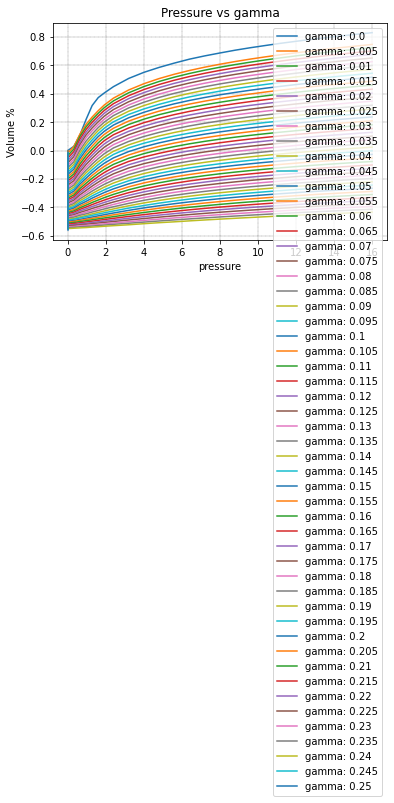

In [7]:
from matplotlib import pyplot as plt
# grid = plt.grid(color='r', linestyle='-', linewidth=2)
fig, ax = plt.subplots(1,1)
legends = []
for (name, group) in vol_df_grouped:
    group.plot(kind='line',x='pressure',y='perc_vol',ax=ax, title="Pressure vs gamma")
    legends.append("gamma: {v}".format(v=np.round(name,3)))
    # group.plot(kind='line',x='pressure',y='perc_vol', ax=ax, secondary_y=True)
    # group.plot(x =['pressure', 'pressure'], y=['volume', 'perc_vol'], title=name, secondary_y=True, grid=grid)
ax.grid(color='k', linestyle='--', linewidth=0.25)
ax.legend(legends)
ax.set_ylabel("Volume %")

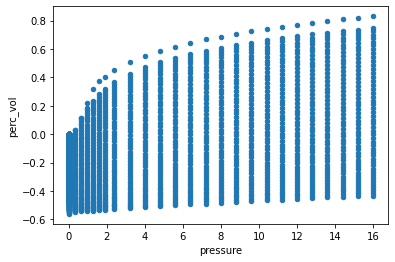

In [8]:
df.plot(x="pressure", y="perc_vol", kind="scatter")

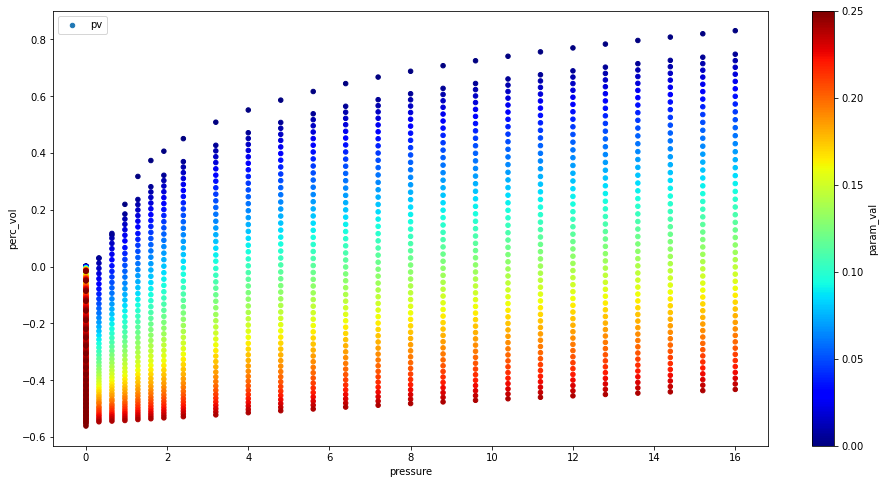

In [9]:
fig, ax = plt.subplots()
df.plot(kind="scatter", x="pressure", y="perc_vol", alpha=1, figsize=(16,8), c="param_val", cmap=plt.get_cmap("jet"), colorbar=True, label="pv", ax=ax)
plt.show()

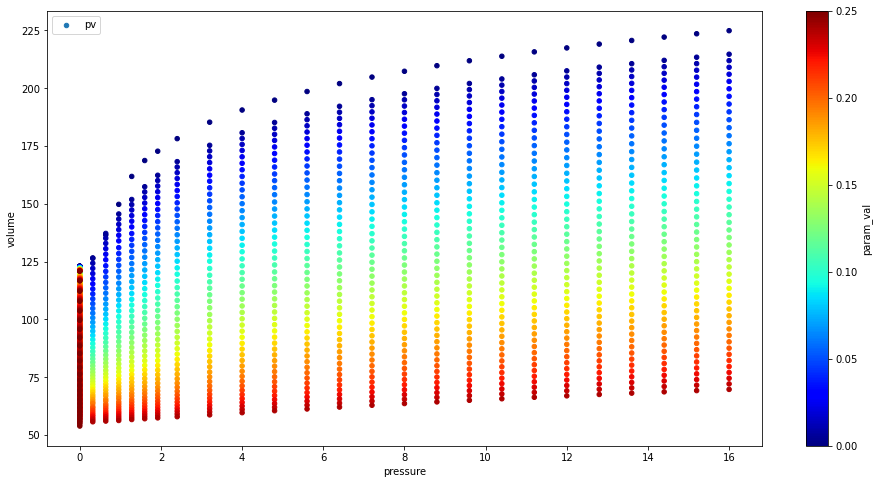

In [10]:
fig, ax = plt.subplots()
df.plot(kind="scatter", x="pressure", y="volume", alpha=1, figsize=(16,8), c="param_val", cmap=plt.get_cmap("jet"), colorbar=True, label="pv", ax=ax)
plt.show()

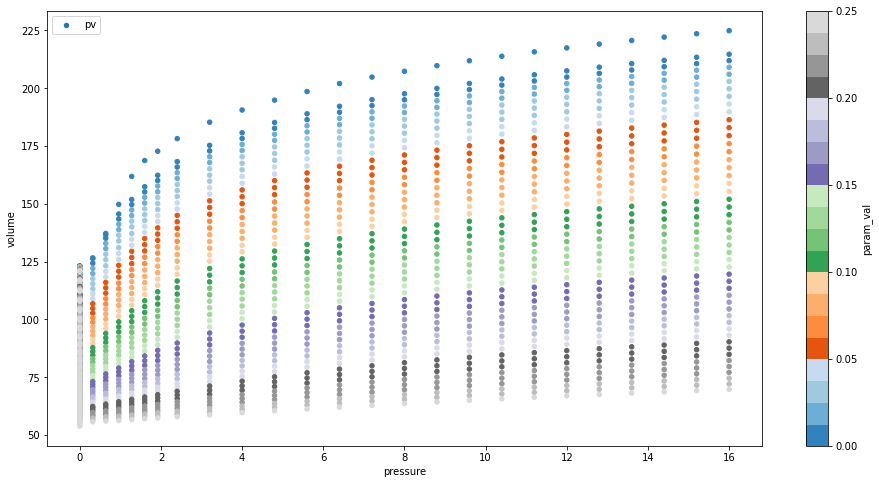

In [42]:
fig, ax = plt.subplots()
df.plot(kind="scatter", x="pressure", y="volume", alpha=1, figsize=(16,8), c="param_val", cmap=plt.get_cmap("tab20c"), colorbar=True, label="pv", ax=ax)
plt.show()

In [11]:
df.to_pickle("D:\\Igor\\Research_USF\\University of South Florida\\Mao, Wenbin - Igor\\Febio-Models\\Active-Models\\PAQ\\Gamma-50\\final-data\\final-df.pickle")